In [1]:
!pip install qiskit qiskit-aer pylatexenc

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

Circuit Diagram:


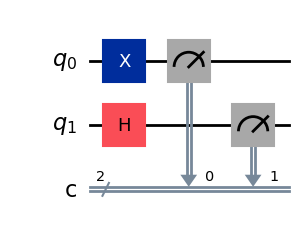


Measurement Results: {'11': 520, '01': 504}


In [4]:
#Experiment: Understanding Tensor Product States Using Qiskit
qc = QuantumCircuit(2, 2)

qc.x(0)   
qc.h(1)     
qc.measure([0, 1], [0, 1])

print("Circuit Diagram:")
display(qc.draw('mpl'))

simulator = AerSimulator()
compiled_qc = transpile(qc, simulator)
result = simulator.run(compiled_qc, shots=1024).result()
counts = result.get_counts()
print("\nMeasurement Results:", counts)
plot_histogram(counts)
plt.show()

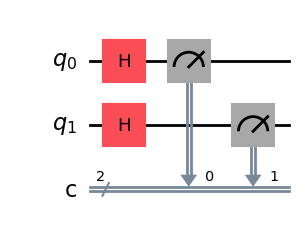

{'11': 267, '01': 256, '10': 250, '00': 251}


In [7]:
#Task 1: Apply Hadamard on Both Qubits
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.h(1)

qc.measure([0,1], [0,1])
display(qc.draw('mpl'))

sim = AerSimulator()
res = sim.run(transpile(qc, sim), shots=1024).result()
counts = res.get_counts()
plot_histogram(counts)
plt.show()
print(counts)

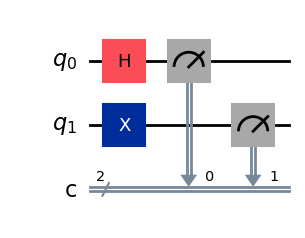

{'10': 526, '11': 498}


In [9]:
#Task 2: Apply X Gate on Qubit 1 Instead of Qubit 0
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.x(1)

qc.measure([0,1],[0,1])
display(qc.draw('mpl'))

sim = AerSimulator()
res = sim.run(transpile(qc, sim), shots=1024).result()
counts = res.get_counts()
plot_histogram(counts)
plt.show()
print(counts)

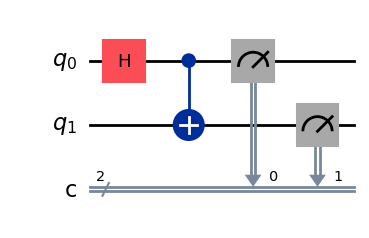

{'00': 517, '11': 507}


In [11]:
#Task 3: Add CNOT After Hadamard
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0,1)

qc.measure([0,1],[0,1])
display(qc.draw('mpl'))

sim = AerSimulator()
res = sim.run(transpile(qc, sim), shots=1024).result()
counts = res.get_counts()
plot_histogram(counts)
plt.show()
print(counts)

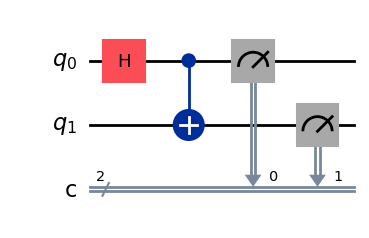

{'11': 2050, '00': 2046}


In [13]:
#Task 4: Increase Measurement Shots to 4096
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0,1)

qc.measure([0,1],[0,1])
display(qc.draw('mpl'))

sim = AerSimulator()
res = sim.run(transpile(qc, sim), shots=4096).result()
counts = res.get_counts()
plot_histogram(counts)
plt.show()
print(counts)

Statevector BEFORE Entanglement:
 Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


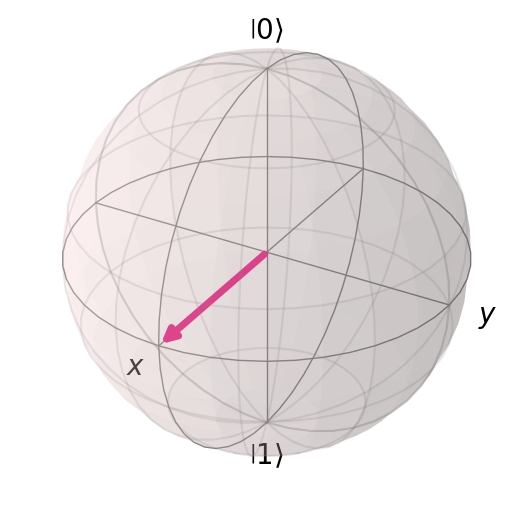

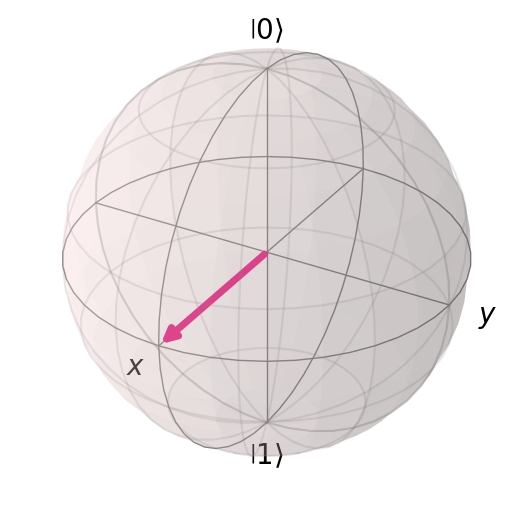


Statevector AFTER Entanglement:
 Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


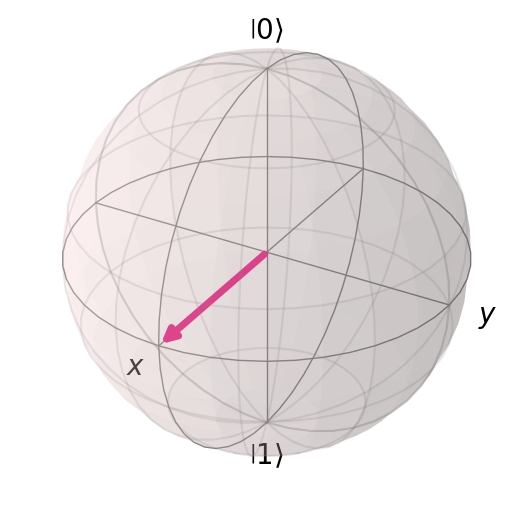

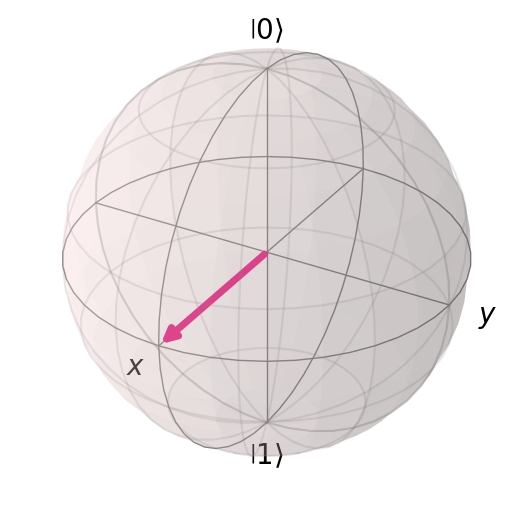

In [29]:
#Task 5: Visualize State on Bloch Sphere
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix, partial_trace, Pauli
from qiskit.visualization.bloch import Bloch
import matplotlib.pyplot as plt
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
state_before = Statevector.from_instruction(qc)
print("Statevector BEFORE Entanglement:\n", state_before)
rho_before = DensityMatrix(state_before)
rho0_before = partial_trace(rho_before, [1])
rho1_before = partial_trace(rho_before, [0])
def draw_bloch(rho, title):
    bloch = Bloch()
    bloch.add_vectors([rho.expectation_value(Pauli('X')).real,
                       rho.expectation_value(Pauli('Y')).real,
                       rho.expectation_value(Pauli('Z')).real])
    bloch.title = title
    bloch.show()
draw_bloch(rho0_before, "Qubit 0 (Before CNOT)")
draw_bloch(rho1_before, "Qubit 1 (Before CNOT)")
qc.cx(0, 1)
state_after = Statevector.from_instruction(qc)
print("\nStatevector AFTER Entanglement:\n", state_after)
rho_after = DensityMatrix(state_after)
rho0_after = partial_trace(rho_after, [1])
rho1_after = partial_trace(rho_after, [0])
draw_bloch(rho0_after, "Qubit 0 (After CNOT)")
draw_bloch(rho1_after, "Qubit 1 (After CNOT)")